In [15]:
import pandas as pd 

In [16]:
df=pd.read_csv("premier_league_0607.csv")

In [17]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,19/08/06,Arsenal,Aston Villa,1,1,D,0,0,D,G Poll,...,11,3,10,19,18,1,1,2,0,0
1,19/08/06,Bolton,Tottenham,2,0,H,2,0,H,P Dowd,...,6,6,19,22,6,3,0,1,0,0
2,19/08/06,Everton,Watford,2,1,H,1,0,H,P Walton,...,2,8,12,13,0,6,2,2,0,0
3,19/08/06,Newcastle,Wigan,2,1,H,1,0,H,M Atkinson,...,8,9,17,20,4,11,1,2,0,0
4,19/08/06,Portsmouth,Blackburn,3,0,H,1,0,H,A Wiley,...,16,7,20,17,6,2,2,1,0,2


In [18]:
df.drop(columns=["HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","HTHG","HTAG","HTR","Referee"],inplace=True)

In [19]:
df["Result"] = df.apply(
    lambda row: "H" if row["FTHG"] > row["FTAG"] else "A" if row["FTAG"] > row["FTHG"] else "D",
    axis=1
)

In [20]:
df["AwayTeam"].value_counts()

AwayTeam
Aston Villa         19
Tottenham           19
Watford             19
Wigan               19
Blackburn           19
Middlesbrough       19
Liverpool           19
Charlton            19
Man City            19
Fulham              19
Sheffield United    19
West Ham            19
Reading             19
Everton             19
Man United          19
Bolton              19
Portsmouth          19
Chelsea             19
Arsenal             19
Newcastle           19
Name: count, dtype: int64

<Axes: >

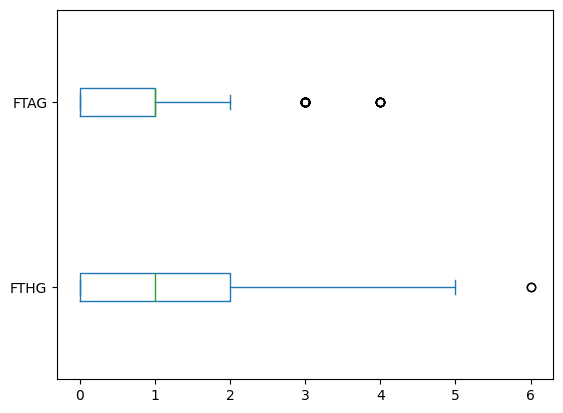

In [21]:
df[["FTHG","FTAG"]].plot(kind="box",vert=False)

### What is the average number of goals per match?

In [22]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result
0,19/08/06,Arsenal,Aston Villa,1,1,D,D
1,19/08/06,Bolton,Tottenham,2,0,H,H
2,19/08/06,Everton,Watford,2,1,H,H
3,19/08/06,Newcastle,Wigan,2,1,H,H
4,19/08/06,Portsmouth,Blackburn,3,0,H,H


In [23]:
total_goals_per_match=df["FTHG"] + df["FTAG"]

In [24]:
total_goals_per_match.sum()

np.int64(931)

In [25]:
total_goals= total_goals_per_match.sum()

In [26]:
df.shape

(380, 7)

In [27]:
average_goal_per_match=total_goals/380

In [28]:
average_goal_per_match

np.float64(2.45)

ayhy 1 line e.........

In [29]:
(df["FTHG"] + df["FTAG"]).mean()

np.float64(2.45)

### Total goals column

In [30]:
df["Total Goals"] = df["FTHG"] + df["FTAG"]

In [31]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,Total Goals
0,19/08/06,Arsenal,Aston Villa,1,1,D,D,2
1,19/08/06,Bolton,Tottenham,2,0,H,H,2
2,19/08/06,Everton,Watford,2,1,H,H,3
3,19/08/06,Newcastle,Wigan,2,1,H,H,3
4,19/08/06,Portsmouth,Blackburn,3,0,H,H,3


In [32]:
df.sort_values(by="Date")

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,Total Goals
212,01/01/07,Newcastle,Man United,2,2,D,D,4
210,01/01/07,Man City,Everton,2,1,H,H,3
209,01/01/07,Liverpool,Bolton,3,0,H,H,3
208,01/01/07,Fulham,Watford,0,0,D,D,0
213,01/01/07,Portsmouth,Tottenham,1,1,D,D,2
...,...,...,...,...,...,...,...,...
302,31/03/07,Liverpool,Arsenal,4,1,H,H,5
301,31/03/07,Fulham,Portsmouth,1,1,D,D,2
300,31/03/07,Charlton,Wigan,1,0,H,H,1
299,31/03/07,Bolton,Sheffield United,1,0,H,H,1


### Biggest goal difference in a match

In [33]:
(df["FTAG"]-df["FTHG"]).max()

np.int64(4)

In [34]:
(df["FTHG"]-df["FTAG"]).max()

np.int64(6)

### Whats the team of most away wins?

In [35]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,Total Goals
0,19/08/06,Arsenal,Aston Villa,1,1,D,D,2
1,19/08/06,Bolton,Tottenham,2,0,H,H,2
2,19/08/06,Everton,Watford,2,1,H,H,3
3,19/08/06,Newcastle,Wigan,2,1,H,H,3
4,19/08/06,Portsmouth,Blackburn,3,0,H,H,3


In [36]:
df.loc[df["Result"]=="A"].groupby(by="AwayTeam")["Result"].size().sort_values(ascending=False)

AwayTeam
Man United          13
Chelsea             12
Arsenal              7
Bolton               7
Liverpool            6
Blackburn            6
Man City             6
Tottenham            5
Reading              5
Wigan                5
Aston Villa          4
Everton              4
West Ham             4
Newcastle            4
Sheffield United     3
Portsmouth           3
Middlesbrough        2
Watford              2
Charlton             1
Fulham               1
Name: Result, dtype: int64

### Which team scored most goals at home?

In [37]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,Total Goals
0,19/08/06,Arsenal,Aston Villa,1,1,D,D,2
1,19/08/06,Bolton,Tottenham,2,0,H,H,2
2,19/08/06,Everton,Watford,2,1,H,H,3
3,19/08/06,Newcastle,Wigan,2,1,H,H,3
4,19/08/06,Portsmouth,Blackburn,3,0,H,H,3


In [38]:
df.groupby("HomeTeam")["FTHG"].sum().sort_values(ascending=False)

HomeTeam
Man United          46
Arsenal             43
Liverpool           39
Chelsea             37
Tottenham           34
Everton             33
Blackburn           31
Middlesbrough       31
Reading             29
Portsmouth          28
Bolton              26
West Ham            24
Sheffield United    24
Newcastle           23
Aston Villa         20
Charlton            19
Watford             19
Fulham              18
Wigan               18
Man City            10
Name: FTHG, dtype: int64

In [39]:
df.loc[df["HomeTeam"]== "Arsenal"]["FTHG"].sum()

np.int64(43)

In [40]:
df.groupby("HomeTeam")["FTAG"].sum().sort_values().head(1)

HomeTeam
Liverpool    7
Name: FTAG, dtype: int64

### Away from home goals

In [41]:
df.groupby("AwayTeam")["FTAG"].sum().sort_values(ascending=False).head(1)

AwayTeam
Man United    37
Name: FTAG, dtype: int64

### whats the team received least amount of goals while playing at home?

In [42]:
df.groupby("HomeTeam")["FTAG"].sum().sort_values().head(1)

HomeTeam
Liverpool    7
Name: FTAG, dtype: int64

In [43]:
### Goals received/Home Games
df["Result"] = df.apply(
    lambda row: "H" if row["FTHG"] > row["FTAG"] else "A" if row["FTAG"] > row["FTHG"] else "D",
    axis=1
)

In [44]:
df["Goals Received Ratio in Home"]= df.groupby("HomeTeam")["FTAG"].sum()/df.groupby("HomeTeam").size()

In [45]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Result,Total Goals,Goals Received Ratio in Home
0,19/08/06,Arsenal,Aston Villa,1,1,D,D,2,NaN
1,19/08/06,Bolton,Tottenham,2,0,H,H,2,NaN
2,19/08/06,Everton,Watford,2,1,H,H,3,NaN
3,19/08/06,Newcastle,Wigan,2,1,H,H,3,NaN
4,19/08/06,Portsmouth,Blackburn,3,0,H,H,3,NaN


In [46]:
df.groupby("HomeTeam")["FTAG"].sum()/df.groupby("HomeTeam").size()

HomeTeam
Arsenal             0.842105
Aston Villa         0.736842
Blackburn           1.315789
Bolton              1.052632
Charlton            1.052632
Chelsea             0.578947
Everton             0.894737
Fulham              0.947368
Liverpool           0.368421
Man City            0.842105
Man United          0.631579
Middlesbrough       1.263158
Newcastle           1.052632
Portsmouth          0.789474
Reading             1.052632
Sheffield United    1.105263
Tottenham           1.157895
Watford             1.315789
West Ham            1.368421
Wigan               1.578947
dtype: float64

In [47]:
df.groupby("HomeTeam").size()

HomeTeam
Arsenal             19
Aston Villa         19
Blackburn           19
Bolton              19
Charlton            19
Chelsea             19
Everton             19
Fulham              19
Liverpool           19
Man City            19
Man United          19
Middlesbrough       19
Newcastle           19
Portsmouth          19
Reading             19
Sheffield United    19
Tottenham           19
Watford             19
West Ham            19
Wigan               19
dtype: int64